In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')
data.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [3]:
data['quantity'].value_counts()

1     4355
2      224
3       28
4       10
15       1
7        1
10       1
5        1
8        1
Name: quantity, dtype: int64

Всего заказов:

In [4]:
data['quantity'].count()

4622

Уникальных категорий товара было куплено:

In [5]:
data['item_name'].count()

4622

Раз всего item_name'ов 4622, то в этой колонке пропусков нет, как и в quantity

In [6]:
data['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

Проверим, есть ли пропуски в choice_description (есть, уже в хвосте видны NaN):

In [7]:
print(data['choice_description'][4616])
print(data['choice_description'][4617])

nan
[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]


Next thing doesn't work, lol:

In [8]:
print(data['choice_description'][4616] == None)
print(data['choice_description'][4616] == 'nan')
print(data['choice_description'][4616] == 'NaN')
print(data['choice_description'][4616] == [])

False
False
False
False


In [9]:
type(data['item_price'][5])

str

Давайте преобразуем ее в число:

*pd.to_numeric(data['item_price']) - ошибка, мешается знак $*

Yo, Python!<br>
Next thing doesn't work with sign '$':

In [10]:
#data['item_price'] = data['item_price'].replace({'$':'0'}, regex=True)
#data.head()

item_price:
    $2.39 0  
    $3.39 0  
    $3.39 0  
    $2.39 0  
    $16.98 0  

В питоне строки - неизменяемый тип данных. Можно из строки прочитать по индексу, но нельзя заменить часть строки.         
Можно только создать новую строку из старой и нового символа, и записать результат в ту же переменную.

In [11]:
price_list = []

for i in range(data['item_price'].count()):
    price = data['item_price'][i]
    price = float(price[1:])
    price_list.append(price)

data['item_price'] = price_list
data['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [12]:
data['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

keep {‘first’, ‘last’, False}, по умолчанию ‘first’.
Определяет, какие дубликаты (если таковые имеются) оставить. - first: удалить дубликаты, кроме первого вхождения. - last: удалить дубликаты, кроме последнего вхождения. - False: удалить все дубликаты.

inplace - bool, по умолчанию False.
Оставлять ли дубликаты на месте или возвращать копию.

In [13]:
df1 = data.sort_values("item_price", inplace=False) 
df1 = df1.drop_duplicates(subset="item_name", inplace=False) 
df1.head(5)

,order_id,quantity,item_name,choice_description,item_price
1140,471,1,Bottled Water,NaN,1.09
821,338,1,Canned Soda,[Coca Cola],1.09
567,233,1,Canned Soft Drink,[Diet Coke],1.25
2367,942,1,Side of Chips,NaN,1.69
4509,1793,1,Chips,NaN,1.99


In [14]:
df2 = data.sort_values("item_price", inplace=False, ascending=False) 
df2 = df2.drop_duplicates(subset="item_name", inplace=False) 
df2.head(5)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94


In [15]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [16]:
sum(data[data['item_name'] == 'Chicken Bowl']['quantity'] > 1)

33

Pandas dataframe.groupby() function is used to split the data into groups based on some criteria.            
Pandas objects can be split on any of their axes (осей).

In [17]:
df = data.groupby('order_id')
df.get_group(1443)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


In [18]:
print('Total price:', sum(df.get_group(1443)['item_price']))

Total price: 160.74


In [19]:
print('Mean price by order_id:\n\n', 
          df['item_price'].mean())

Mean price by order_id:

 order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
6        8.750000
7        7.850000
8        5.440000
9        5.335000
10       6.600000
11       6.190000
12       7.185000
13       5.440000
14       5.040000
15       5.440000
16       5.340000
17       5.040000
18       6.225000
19       6.950000
20       9.050000
21       7.786667
22       6.490000
23       5.585000
24       6.035000
25       5.690000
26      10.250000
27       6.950000
28       8.425000
29       8.990000
30       7.786667
          ...    
1805    10.000000
1806     3.250000
1807     9.320000
1808     6.850000
1809     4.816667
1810    11.500000
1811     9.750000
1812     7.500000
1813    17.500000
1814     6.850000
1815     6.250000
1816     6.600000
1817     3.250000
1818     9.070000
1819     6.600000
1820     6.250000
1821     6.850000
1822     7.666667
1823     4.050000
1824     8.983333
1825    11.083333
1826     3.987500
1827     6.

In [20]:
print('Total mean price of check:',
         sum(df['item_price'].mean()) / len(df))

print('Mean amount of items in order:',
         sum( df['item_price'].count() / len(df['item_price']) ))

Total mean price of check: 7.841910975496643
Mean amount of items in order: 2.5201744820065457


Самая популярная категория товара:

In [21]:
df = data.groupby(['item_name']) \
        .count() \
        .sort_values(['quantity'], ascending=False)

df.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,726,726,726,726


In [22]:
buro = data[data["item_name"].isin(['Chicken Bowl'])]
buro.head(3)

# buro = data[data["item_name"].find('Burrito')]  -  all this curses
# buro = data['Burrito' in data["item_name"]]  -  doesn't work with strings

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


Виды Burrito:

In [23]:
from collections import Counter

burritos = []

for item in data['item_name']:
    if ('Burrito' in item):
        burritos.append(item)
    
print(Counter(burritos).keys())
print(Counter(burritos).values())

dict_keys(['Steak Burrito', 'Chicken Burrito', 'Barbacoa Burrito', 'Carnitas Burrito', 'Veggie Burrito', 'Burrito'])
dict_values([368, 553, 91, 59, 95, 6])


Определим, в каком количестве заказов есть товар, который стоит более 40% от суммы всего чека:

In [24]:
# Найдем сумму всего чека
prices_by_order = data.groupby('order_id')['item_price'].sum().tolist()
print(type(prices_by_order))
print(prices_by_order[:5])
print(len(prices_by_order))

<class 'list'>
[11.56, 16.98, 12.67, 21.0, 13.7]
1834


*When need to apply groupby, the indexes of the original DataFrame are not the same. <br>All the elements with the same 'order_id' have been grouped together. Therefore, when want to a specific index, <br>need to 1) select the group or 'order_id' or 2) the index of the 'item_price' for each group.*

In [25]:
total_prices = data.groupby('order_id')
#print(len(total_prices['item_price']))
total_amount = 0
amount_per_order = 0

for i in range(1, len(total_prices['item_price'])+1):
    prices_by_order[i-1] = prices_by_order[i-1] * 0.4
    for j in range(len(total_prices['item_price'].get_group(i))):
        if ( (total_prices['item_price'].get_group(i).iloc[j] - prices_by_order[i-1]) > 1e-14):
                  total_amount += 1
                
for i in range(1, len(total_prices['item_price'])+1):
    for j in range(len(total_prices['item_price'].get_group(i))):
        if ( (total_prices['item_price'].get_group(i).iloc[j] - prices_by_order[i-1]) > 1e-14):
            amount_per_order += 1
            break        

print(total_amount)
print(amount_per_order)

2087
1624


Создадим новый DateFrame из матрицы. Назовем колонки index, column1, column2 и сделаем первую колонку индексом.

In [26]:
import numpy as np


matrix = np.random.rand(10, 3)
matrix

array([[0.36371219, 0.12070612, 0.76254294],
       [0.26105499, 0.46979221, 0.91538054],
       [0.50865723, 0.25813522, 0.0441458 ],
       [0.54777149, 0.77968564, 0.72439919],
       [0.49553634, 0.76062361, 0.09887005],
       [0.2743588 , 0.58268429, 0.1000367 ],
       [0.74789946, 0.2925367 , 0.41524124],
       [0.47836098, 0.03371903, 0.27949432],
       [0.53448471, 0.17051524, 0.75233202],
       [0.73223885, 0.50877391, 0.7592792 ]])

In [27]:
matrix = pd.DataFrame(matrix)
matrix

,0,1,2
0,0.363712,0.120706,0.762543
1,0.261055,0.469792,0.915381
2,0.508657,0.258135,0.044146
3,0.547771,0.779686,0.724399
4,0.495536,0.760624,0.098870
5,0.274359,0.582684,0.100037
6,0.747899,0.292537,0.415241
7,0.478361,0.033719,0.279494
8,0.534485,0.170515,0.752332
9,0.732239,0.508774,0.759279


In [28]:
matrix = matrix.rename(columns={0: 'index', 1:'column1', 2:'column2'})
matrix

,index,column1,column2
0,0.363712,0.120706,0.762543
1,0.261055,0.469792,0.915381
2,0.508657,0.258135,0.044146
3,0.547771,0.779686,0.724399
4,0.495536,0.760624,0.098870
5,0.274359,0.582684,0.100037
6,0.747899,0.292537,0.415241
7,0.478361,0.033719,0.279494
8,0.534485,0.170515,0.752332
9,0.732239,0.508774,0.759279


Сохраним матрицу:

In [29]:
matrix.to_csv('rand_matrix1.csv') 

Сохраним матрицу без индексов и названий столбцов:

In [30]:
matrix.to_csv('rand_matrix2.csv', header=False, index=False)

In [31]:
prices_in_group = []
total_prices = data.groupby('order_id')

type(total_prices)
    

pandas.core.groupby.generic.DataFrameGroupBy

-----------
-----------
-----------

* plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
* hist — гистограмма, показывающая распределение некоторое величины;
* scatter — график, показывающий взаимосвязь двух величин;
* bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

* на графиках должны быть подписаны оси;
* у визуализации должно быть название;
* если изображено несколько графиков, то необходима поясняющая легенда;
* все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
* если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
* сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [32]:
# нужно для отображения графиков внутри ноутбука
%matplotlib inline 
import matplotlib.pyplot as plt

Добавим новую колонку с датой покупки:

In [33]:
import datetime, random

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=data.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(data.order_id.nunique())]

data['date'] = data.order_id.map(dates['date'])
data.head(10)

,order_id,quantity,item_name,choice_description,item_price,date
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2019-01-25
1,1,1,Izze,[Clementine],3.39,2019-01-25
2,1,1,Nantucket Nectar,[Apple],3.39,2019-01-25
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2019-01-25
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2019-01-06
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,2019-01-26
6,3,1,Side of Chips,NaN,1.69,2019-01-26
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,2019-01-01
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,2019-01-01
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,2019-01-30


Построим гистограмму распределения сумм покупок:

In [34]:
prices_by_orderID = data.groupby('order_id')['item_price'].sum()
prices_by_orderID.head(10)

order_id
1     11.56
2     16.98
3     12.67
4     21.00
5     13.70
6     17.50
7     15.70
8     10.88
9     10.67
10    13.20
Name: item_price, dtype: float64

In [35]:
prices_by_orderID.value_counts().head()

13.20    73
17.50    64
12.48    45
22.50    42
12.15    40
Name: item_price, dtype: int64

*Пример того, что Python - дэбил:
    <br>строит не prices_by_orderID, а prices_by_orderID.count(), OMG*

(10, 100)

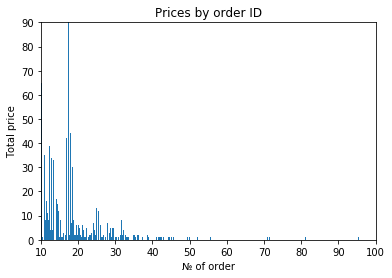

In [36]:
fig, axs = plt.subplots()
n_bins = len(prices_by_orderID)

axs.hist(prices_by_orderID, bins=n_bins)
axs.set_title('Prices by order ID')
axs.set_ylabel('Total price')
axs.set_xlabel('№ of order')
axs.set_ylim([0,90])
axs.set_xlim([10,100])

*А вот норм тема:*

Text(0.5, 0, '№ of order')

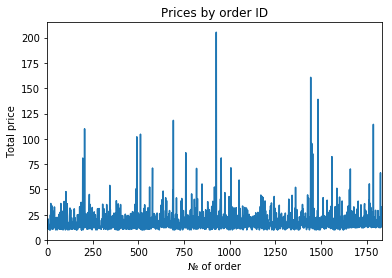

In [37]:
axes = prices_by_orderID.plot.line()
axes.set_title('Prices by order ID')
axes.set_ylabel('Total price')
axes.set_xlabel('№ of order')

Построим гистограмму средних цен отдельных видов продуктов item_name:

*Сначала, конечно, посмотрим на приколы от Python'а, аххаха*

In [38]:
df = data.groupby('order_id')
df_mean = df['item_price'].mean()

n_bins = len(df_mean)

axs.hist(df_mean, bins=n_bins)
axs.set_title('Mean prices by order ID')
axs.set_ylabel('Mean price')
axs.set_xlabel('№ of order')

Text(0.5, 17.200000000000003, '№ of order')

Text(0.5, 0, '№ of order')

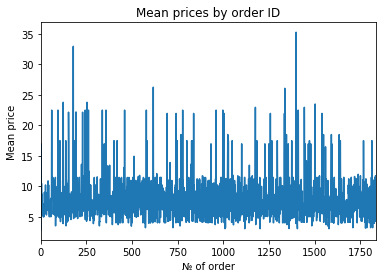

In [39]:
axes = df_mean.plot.line()
axes.set_title('Mean prices by order ID')
axes.set_ylabel('Mean price')
axes.set_xlabel('№ of order')

Построим график зависимости суммы покупок от дней:

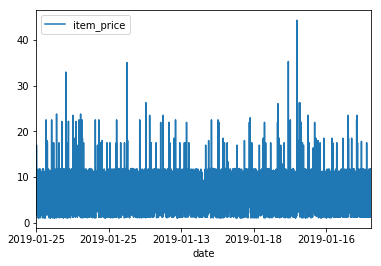

In [40]:
# Пока что не то, что нужно
data.plot(x='date', y='item_price')
plt.show()

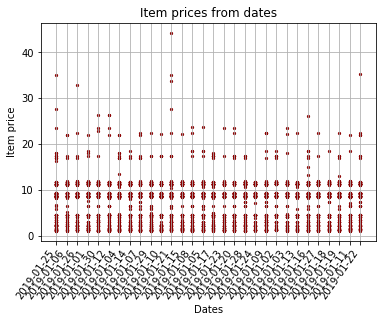

In [41]:
plt.scatter(data['date'], data['item_price'], s=5, c='DarkRed')
plt.xticks(rotation=55, ha='right')
plt.title('Item prices from dates')
plt.ylabel('Item price')
plt.xlabel('Dates')
plt.grid(True)